Importer les libs necessaires 

In [59]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# 1- Récuperation du Data   : 


Récuperation des données à travers API sous format json

In [21]:
response=requests.get('https://opendata.paris.fr/api/records/1.0/search/?dataset=chantiers-perturbants&q=&rows=156').json()['records']

Affichage des données  recuperés

In [22]:
response

[{'datasetid': 'chantiers-perturbants',
  'fields': {'cp_arrondissement': '75009',
   'date_debut': '2021-10-25',
   'date_fin': '2023-03-30',
   'geo_point_2d': [48.87344052287211, 2.328085509823654],
   'geo_shape': {'coordinates': [[[2.328310806581139, 48.87318932853785],
      [2.328167808124058, 48.87322897834712],
      [2.327746203305194, 48.87347407998254],
      [2.32782171140546, 48.873632741040495],
      [2.328343969910743, 48.87355476979858],
      [2.328310806581139, 48.87318932853785]]],
    'type': 'Polygon'},
   'identifiant': 'CP002163',
   'identifiant_ctv': '457934',
   'impact_circulation': 'RESTREINTE',
   'impact_circulation_detail': "Maintien d'une file de circulation sur la rue de Caumartin et réduction d'une sur le bd Haussmann entre Caumartin et Auber.",
   'maitre_ouvrage': 'BNP',
   'niveau_perturbation': 1,
   'numero_stv': 11,
   'objet': 'REHABILITATION_IMMEUBLE',
   'statut': 2,
   'typologie': 3,
   'voie': '51/53 bd Haussmann / 16/18 rue Auber / 47/49

# 2- Data Understanding  : 

Prépartion  pour transformer json en dataFrame 

In [23]:
listrec =[]
for d in response:  
    listrec.append(d['fields'])
print(listrec)

[{'date_fin': '2023-03-30', 'date_debut': '2021-10-25', 'niveau_perturbation': 1, 'typologie': 3, 'voie': '51/53 bd Haussmann / 16/18 rue Auber / 47/49 rue Caumartin', 'maitre_ouvrage': 'BNP', 'statut': 2, 'identifiant': 'CP002163', 'impact_circulation_detail': "Maintien d'une file de circulation sur la rue de Caumartin et réduction d'une sur le bd Haussmann entre Caumartin et Auber.", 'impact_circulation': 'RESTREINTE', 'geo_shape': {'coordinates': [[[2.328310806581139, 48.87318932853785], [2.328167808124058, 48.87322897834712], [2.327746203305194, 48.87347407998254], [2.32782171140546, 48.873632741040495], [2.328343969910743, 48.87355476979858], [2.328310806581139, 48.87318932853785]]], 'type': 'Polygon'}, 'objet': 'REHABILITATION_IMMEUBLE', 'cp_arrondissement': '75009', 'numero_stv': 11, 'identifiant_ctv': '457934', 'geo_point_2d': [48.87344052287211, 2.328085509823654]}, {'date_fin': '2023-07-31', 'date_debut': '2020-09-07', 'niveau_perturbation': 2, 'typologie': 1, 'voie': 'avenue

- Donnée contenant l'ensemble des chantiers perturbants de la Ville de Paris. 

- Donnée surfacique décrivant l'ensemble des chantiers perturbants de la ville de Paris.

- Les chantiers perturbants sont définis comme « Les chantiers principaux ayant un impact sur la circulation »

- Attention la donnée n'est pas exhaustive et ne représente pas la totalité des chantiers à Paris.

Les chantiers représentés répondent principalement aux critères suivants :

perturbent la circulation des voitures ou des vélos durent plus d'une semaine sont situés sur les voies principales, hors périphérique Les polygones sont créés et renseignés manuellement.

- Description des codes :

* NIVEAU_PERTURBATION	
Code	Valeur
** 2	Perturbant
** 1	Très perturbant
*NUMERO_STV Code	Valeur
** 9	Nord-Ouest
** 10	Nord-Est
** 11	Centre
** 12	Sud
** 13	Sud-Ouest
** 14	Sud-Est
* STATUT Code	Valeur
** 1	A venir
** 2	En cours
** 3	Suspendu
** 4	Prolongé
** 5	Terminé
* TYPOLOGIE Code	Valeur
** 1	Ville
** 2	Concessionnaire
** 3	Privé

In [24]:
df= pd.DataFrame(listrec)

In [25]:
df

,date_fin,date_debut,niveau_perturbation,typologie,voie,maitre_ouvrage,statut,identifiant,impact_circulation_detail,impact_circulation,geo_shape,objet,cp_arrondissement,numero_stv,identifiant_ctv,geo_point_2d,precision_localisation,description,url_lic
0,2023-03-30,2021-10-25,1.0,3.0,51/53 bd Haussmann / 16/18 rue Auber / 47/49 r...,BNP,2,CP002163,Maintien d'une file de circulation sur la rue ...,RESTREINTE,"{'coordinates': [[[2.328310806581139, 48.87318...",REHABILITATION_IMMEUBLE,75009,11.0,457934,"[48.87344052287211, 2.328085509823654]",NaN,NaN,NaN
1,2023-07-31,2020-09-07,2.0,1.0,avenue de la Porte de la Chapelle,SG Mission des JO 2024,2,CP001735,entre le bd Ney et l'avenue de la pte de la Ch...,BARRAGE_TOTAL,"{'coordinates': [[[2.360326035093698, 48.89878...",CONSTRUCTION_IMMEUBLE,75018,9.0,NaN,"[48.8994165024635, 2.361067201413404]",n°6,Arena 2,NaN
2,2022-06-07,2022-05-16,2.0,1.0,bd St Germain,STV,2,CP002311,Neutralisation du couloir Bus,RESTREINTE,"{'coordinates': [[[[2.347544935724324, 48.8502...",REFECTION_CHAUSSEE,75005,NaN,NaN,"[48.850232020108585, 2.347727130410587]",Au 51,Remise en état de la voirie suite à l'incendie...,NaN
3,2022-08-05,2022-05-05,2.0,1.0,Place André Malraux,SAP,2,CP002323,Entre rue Richelieu et avenue de l'Opéra\nNeut...,BARRAGE_TOTAL,"{'coordinates': [[[2.3359273153181013, 48.8638...",TRAVAUX_URGENCE,75001,11.0,632134,"[48.86391093572421, 2.3355895034381366]",entre av. de l'Opéra et rue Richelieu,Travaux urgence sécurité sur collecteur. Risqu...,NaN
4,2022-07-23,2022-05-28,2.0,2.0,Rue des Favorites,CPCU,2,CP002334,En 2 phases et Barrage de la rue entre rue de ...,RESTREINTE,"{'coordinates': [[[2.302826939973057, 48.83962...",RACCORDEMENT_RESEAU,75015,13.0,568340,"[48.839586893854595, 2.302814409057834]",Au N°5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-12-31,2019-01-08,1.0,2.0,avenue Friedland,SNCF,2,CP000938,Report de la circulation générale dans la cont...,RESTREINTE,"{'coordinates': [[[2.302276241512825, 48.87455...",CREATION_RESEAUX,75008,9.0,NaN,"[48.87454675024233, 2.302650304455642]",En vis à vis du n°15 au n° 19,"Installation d'une base vie, pour les travaux ...",NaN
152,2022-09-30,2018-10-25,2.0,2.0,Rue de Belleville,RATP L11,2,CP000939,Maintien d'une file par sens,RESTREINTE,"{'coordinates': [[[2.397899421917581, 48.87565...",TRAVAUX_OUVRAGE,75019,10.0,58276,"[48.87550218331863, 2.39710765749235]",entre rue Compans et rue du Docteur Potain.,Adaptation de la station Télégraphe dans le ca...,NaN
153,2022-06-30,2018-11-05,2.0,3.0,13-35 rue du Commandant René Mouchotte,Unibail,2,CP000949,"Maintien d'une file de 3,5m par sens.",RESTREINTE,"{'coordinates': [[[2.320632025024262, 48.83881...",REHABILITATION_IMMEUBLE,75014,12.0,NaN,"[48.8384715478698, 2.3200515888974627]",NaN,NaN,NaN
154,2023-12-29,2019-03-20,1.0,1.0,T3O,Ville de Paris,2,CP001192,Modification des files de circulation selon le...,RESTREINTE,"{'coordinates': [[[2.30164634589797, 48.889187...",TRAVAUX_TRAMWAY,75017,9.0,NaN,"[48.88440847164339, 2.291534655682747]",NaN,NaN,NaN


Description du Data (5 permiers  et derniers  lignes , description de données)

In [26]:
df.head()

,date_fin,date_debut,niveau_perturbation,typologie,voie,maitre_ouvrage,statut,identifiant,impact_circulation_detail,impact_circulation,geo_shape,objet,cp_arrondissement,numero_stv,identifiant_ctv,geo_point_2d,precision_localisation,description,url_lic
0,2023-03-30,2021-10-25,1.0,3.0,51/53 bd Haussmann / 16/18 rue Auber / 47/49 r...,BNP,2,CP002163,Maintien d'une file de circulation sur la rue ...,RESTREINTE,"{'coordinates': [[[2.328310806581139, 48.87318...",REHABILITATION_IMMEUBLE,75009,11.0,457934,"[48.87344052287211, 2.328085509823654]",NaN,NaN,NaN
1,2023-07-31,2020-09-07,2.0,1.0,avenue de la Porte de la Chapelle,SG Mission des JO 2024,2,CP001735,entre le bd Ney et l'avenue de la pte de la Ch...,BARRAGE_TOTAL,"{'coordinates': [[[2.360326035093698, 48.89878...",CONSTRUCTION_IMMEUBLE,75018,9.0,NaN,"[48.8994165024635, 2.361067201413404]",n°6,Arena 2,NaN
2,2022-06-07,2022-05-16,2.0,1.0,bd St Germain,STV,2,CP002311,Neutralisation du couloir Bus,RESTREINTE,"{'coordinates': [[[[2.347544935724324, 48.8502...",REFECTION_CHAUSSEE,75005,NaN,NaN,"[48.850232020108585, 2.347727130410587]",Au 51,Remise en état de la voirie suite à l'incendie...,NaN
3,2022-08-05,2022-05-05,2.0,1.0,Place André Malraux,SAP,2,CP002323,Entre rue Richelieu et avenue de l'Opéra\nNeut...,BARRAGE_TOTAL,"{'coordinates': [[[2.3359273153181013, 48.8638...",TRAVAUX_URGENCE,75001,11.0,632134,"[48.86391093572421, 2.3355895034381366]",entre av. de l'Opéra et rue Richelieu,Travaux urgence sécurité sur collecteur. Risqu...,NaN
4,2022-07-23,2022-05-28,2.0,2.0,Rue des Favorites,CPCU,2,CP002334,En 2 phases et Barrage de la rue entre rue de ...,RESTREINTE,"{'coordinates': [[[2.302826939973057, 48.83962...",RACCORDEMENT_RESEAU,75015,13.0,568340,"[48.839586893854595, 2.302814409057834]",Au N°5,NaN,NaN


In [27]:
df.tail()

,date_fin,date_debut,niveau_perturbation,typologie,voie,maitre_ouvrage,statut,identifiant,impact_circulation_detail,impact_circulation,geo_shape,objet,cp_arrondissement,numero_stv,identifiant_ctv,geo_point_2d,precision_localisation,description,url_lic
151,2022-12-31,2019-01-08,1.0,2.0,avenue Friedland,SNCF,2,CP000938,Report de la circulation générale dans la cont...,RESTREINTE,"{'coordinates': [[[2.302276241512825, 48.87455...",CREATION_RESEAUX,75008,9.0,NaN,"[48.87454675024233, 2.302650304455642]",En vis à vis du n°15 au n° 19,"Installation d'une base vie, pour les travaux ...",NaN
152,2022-09-30,2018-10-25,2.0,2.0,Rue de Belleville,RATP L11,2,CP000939,Maintien d'une file par sens,RESTREINTE,"{'coordinates': [[[2.397899421917581, 48.87565...",TRAVAUX_OUVRAGE,75019,10.0,58276,"[48.87550218331863, 2.39710765749235]",entre rue Compans et rue du Docteur Potain.,Adaptation de la station Télégraphe dans le ca...,NaN
153,2022-06-30,2018-11-05,2.0,3.0,13-35 rue du Commandant René Mouchotte,Unibail,2,CP000949,"Maintien d'une file de 3,5m par sens.",RESTREINTE,"{'coordinates': [[[2.320632025024262, 48.83881...",REHABILITATION_IMMEUBLE,75014,12.0,NaN,"[48.8384715478698, 2.3200515888974627]",NaN,NaN,NaN
154,2023-12-29,2019-03-20,1.0,1.0,T3O,Ville de Paris,2,CP001192,Modification des files de circulation selon le...,RESTREINTE,"{'coordinates': [[[2.30164634589797, 48.889187...",TRAVAUX_TRAMWAY,75017,9.0,NaN,"[48.88440847164339, 2.291534655682747]",NaN,NaN,NaN
155,2022-06-03,2022-03-21,2.0,2.0,Rue La Fayette,CPCU,2,CP002240,En 4 phases avec Maintien d'une voie dans chaq...,RESTREINTE,"{'coordinates': [[[2.366206326673794, 48.88175...",RACCORDEMENT_RESEAU,75010,11.0,NaN,"[48.881679918832795, 2.3660920321884364]",Angle rue du Faubourg St Martin,NaN,http://capgeo.sig.paris.fr/PdfEtImages/Chantie...


In [28]:
df.describe()

,niveau_perturbation,typologie,statut,numero_stv
count,154.000000,152.000000,156.000000,155.000000
mean,1.772727,2.138158,2.057692,11.032258
std,0.420437,0.772451,0.457770,1.613335
min,1.000000,1.000000,1.000000,9.000000
25%,2.000000,2.000000,2.000000,9.000000
50%,2.000000,2.000000,2.000000,11.000000
75%,2.000000,3.000000,2.000000,12.000000
max,2.000000,3.000000,4.000000,15.000000


# 3- Data Preparation  : 

### Recherche des valeurs non significatives ou null 

In [29]:
df_copy=df.copy()

In [30]:
#combien de val manquantes pr chaque colonne
df_copy.isnull().sum().sort_values(ascending=False)

url_lic                      125
identifiant_ctv               72
description                   39
precision_localisation        19
impact_circulation_detail     12
impact_circulation             8
typologie                      4
maitre_ouvrage                 2
voie                           2
niveau_perturbation            2
geo_shape                      1
cp_arrondissement              1
numero_stv                     1
geo_point_2d                   1
statut                         0
identifiant                    0
date_debut                     0
objet                          0
date_fin                       0
dtype: int64

Les valeurs nulles doivent être remplacées par des valeurs significatives  ==> Les colonnes doivent être compris,Si la colonne est intéressante pour notre étude nous pouvons remplacer les valeur NAN par la valeur médiane (cas de valeurs numériques) ou une nouvelle classe "non spécifiée" (cas des valeurs String ).

In [31]:
#replacer le valeurs null  de url 
df_copy['url_lic'] = df_copy['url_lic'].replace(np.nan, 'pas de specification ')
#replacer le valeurs null  de description 
df_copy['description'] = df_copy['description'].replace(np.nan, 'pas de description')


In [33]:
#combien de val manquantes pr chaque colonne
df_copy.isnull().sum().sort_values(ascending=False)

identifiant_ctv              72
precision_localisation       19
impact_circulation_detail    12
impact_circulation            8
typologie                     4
niveau_perturbation           2
voie                          2
maitre_ouvrage                2
numero_stv                    1
geo_point_2d                  1
geo_shape                     1
cp_arrondissement             1
description                   0
date_fin                      0
objet                         0
date_debut                    0
identifiant                   0
statut                        0
url_lic                       0
dtype: int64

In [34]:
df.columns

Index(['date_fin', 'date_debut', 'niveau_perturbation', 'typologie', 'voie',
       'maitre_ouvrage', 'statut', 'identifiant', 'impact_circulation_detail',
       'impact_circulation', 'geo_shape', 'objet', 'cp_arrondissement',
       'numero_stv', 'identifiant_ctv', 'geo_point_2d',
       'precision_localisation', 'description', 'url_lic'],
      dtype='object')

In [36]:
df_copy['niveau_perturbation'].value_counts()

2.0    119
1.0     35
Name: niveau_perturbation, dtype: int64

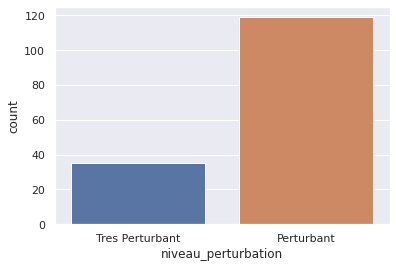

In [70]:
sns.countplot(x="niveau_perturbation", data=df_copy)
plt.xticks([0,1],['Tres Perturbant','Perturbant'])
plt.show()

RESTREINTE       0.817568
SENS_UNIQUE      0.114865
BARRAGE_TOTAL    0.047297
IMPASSE          0.020270
Name: impact_circulation, dtype: float64

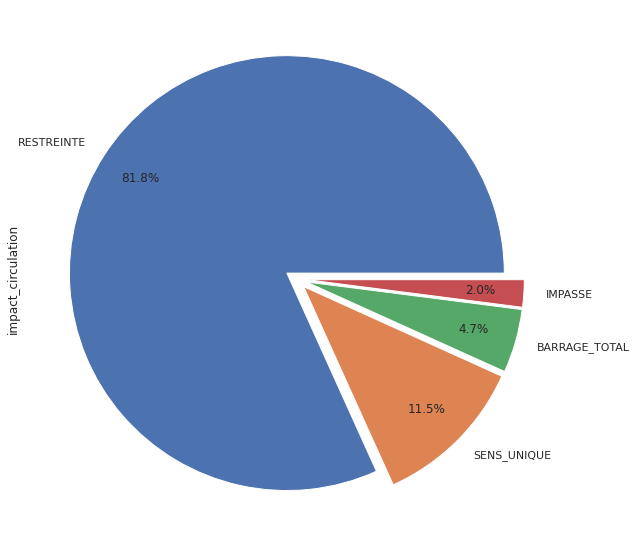

In [106]:
plt.figure(figsize=(10,10))
df['impact_circulation'].value_counts()[0:4].plot.pie(autopct="%.1f%%", explode=[0.05]*4,  pctdistance=0.8)
df['impact_circulation'].value_counts(normalize= True)

In [44]:

df_copy['typologie'].value_counts()


2.0    59
3.0    57
1.0    36
Name: typologie, dtype: int64

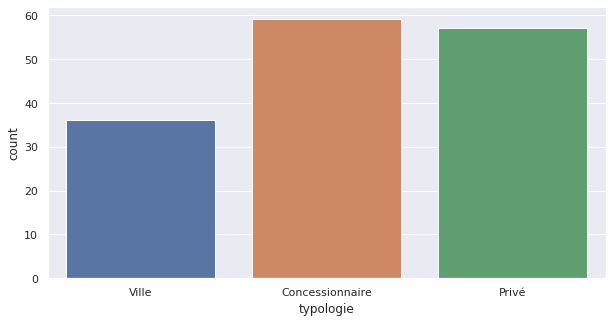

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(x="typologie", data=df_copy)

plt.xticks([0,1,2],['Ville','Concessionnaire', 'Privé'])
plt.show()

In [73]:
df_copy['objet'].value_counts()

REHABILITATION_IMMEUBLE           47
TRAVAUX_OUVRAGE                   22
REAMENAGEMENT_VOIRIE              22
ENTRETIEN_RESEAU                  21
CONSTRUCTION_IMMEUBLE             15
RACCORDEMENT_RESEAU               10
CREATION_RESEAUX                   4
REFECTION_CHAUSSEE                 3
TRAVAUX_URGENCE                    2
CREATION_ENTRETIEN_OUVRAGE_ART     2
INSPECTION_SONDAGE_RESEAU          2
TRAVAUX_TRAMWAY                    2
REAMENAGEMENT_SECTEUR              2
TRAVAUX_PARC_STATIONNEMENT         1
TRAVAUX_PREPARATOIRES              1
Name: objet, dtype: int64

<function matplotlib.pyplot.show>

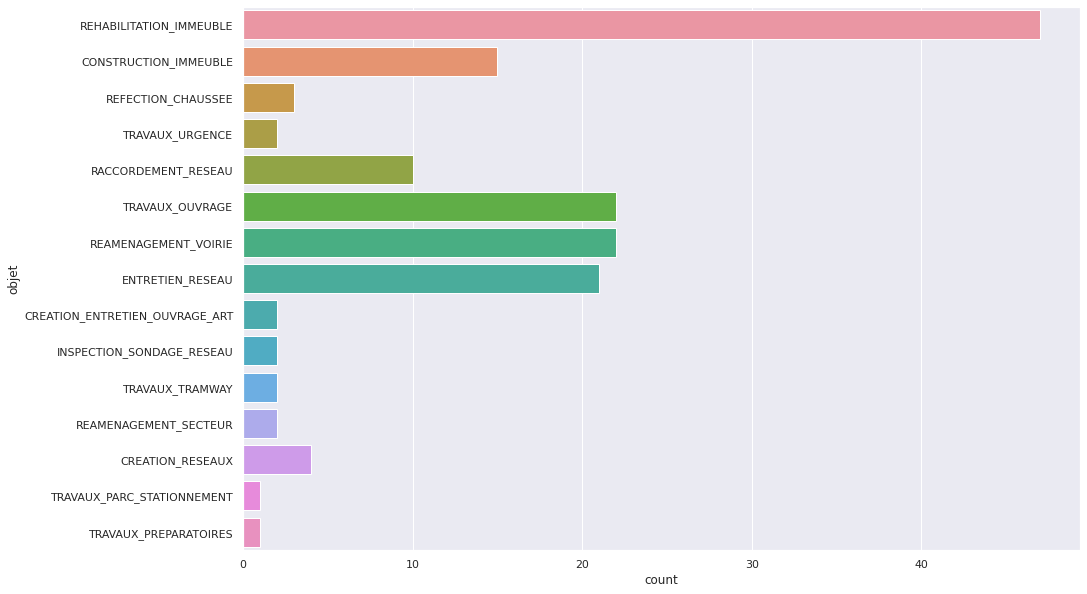

In [74]:
plt.figure(figsize=(15,10))
sns.countplot(y="objet", data=df_copy)
plt.show

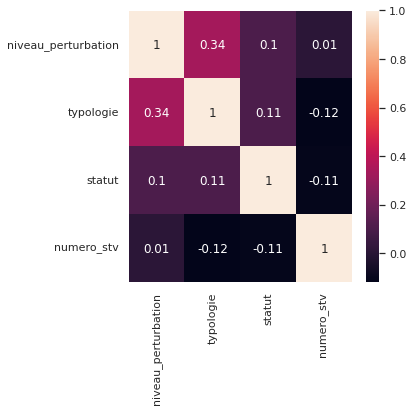

In [77]:
plt.figure(figsize=(5,5))
sns.heatmap(df_copy.corr(), annot=True)

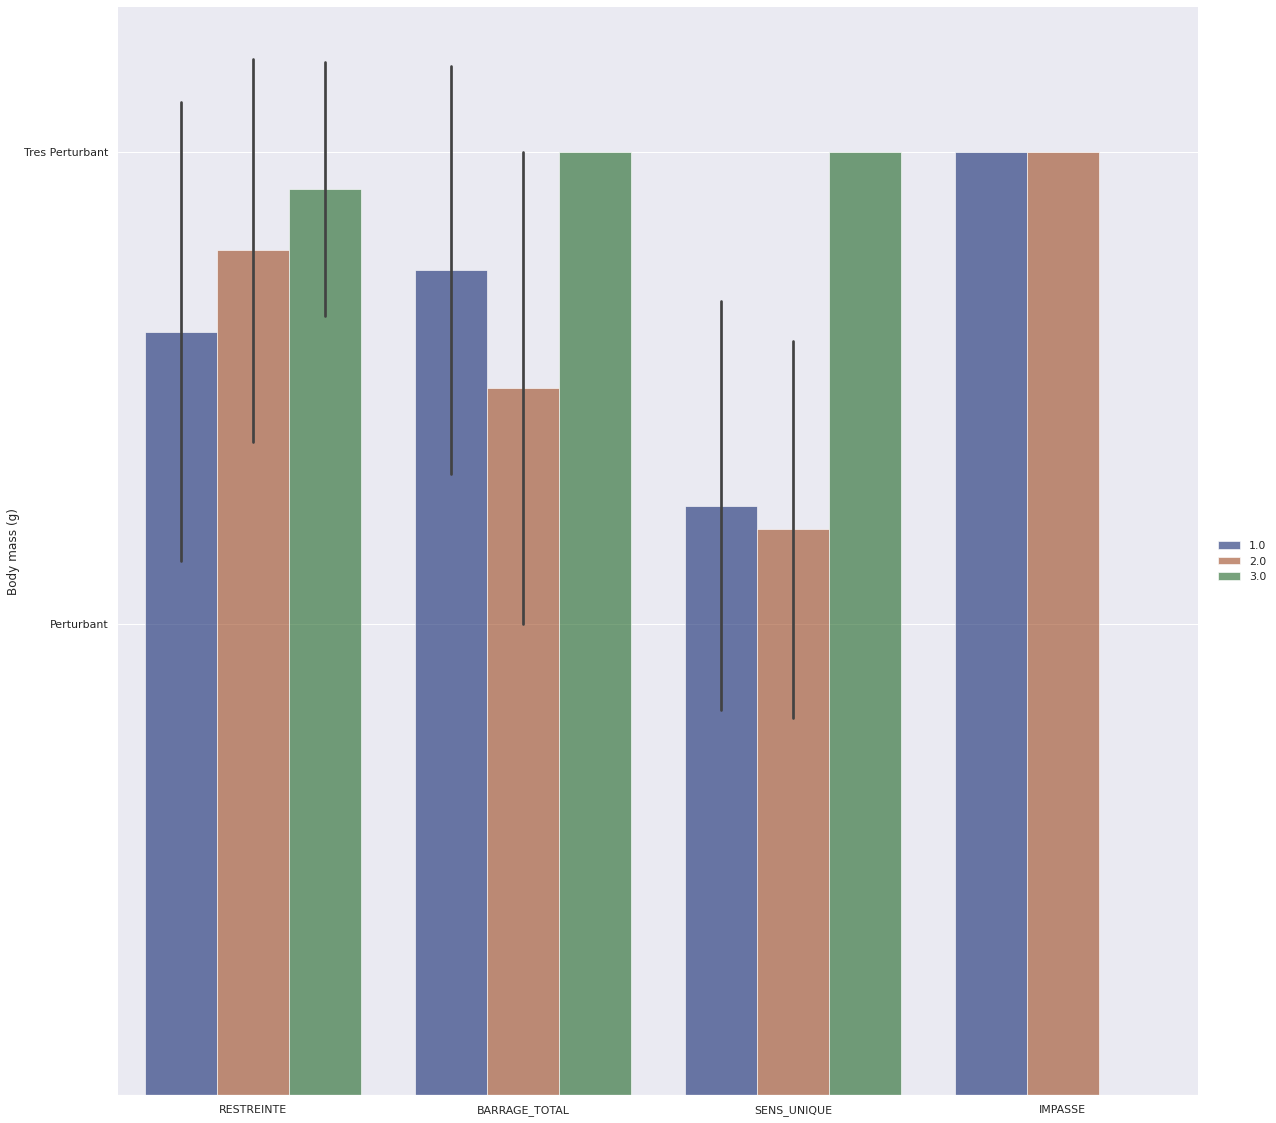

In [111]:
g = sns.catplot(
    data=df_copy, kind="bar",
    x="impact_circulation", y="niveau_perturbation", hue="typologie",
    ci="sd", palette="dark", alpha=.6, height=16, 
)
plt.yticks([2,1],['Tres Perturbant','Perturbant'])

g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [112]:
df_copy.describe()

,niveau_perturbation,typologie,statut,numero_stv
count,154.000000,152.000000,156.000000,155.000000
mean,1.772727,2.138158,2.057692,11.032258
std,0.420437,0.772451,0.457770,1.613335
min,1.000000,1.000000,1.000000,9.000000
25%,2.000000,2.000000,2.000000,9.000000
50%,2.000000,2.000000,2.000000,11.000000
75%,2.000000,3.000000,2.000000,12.000000
max,2.000000,3.000000,4.000000,15.000000


In [113]:
df_copy['impact_circulation'].unique()

array(['RESTREINTE', 'BARRAGE_TOTAL', 'SENS_UNIQUE', nan, 'IMPASSE'],
      dtype=object)

In [114]:
df_copy['impact_circulation'].describe()

count            148
unique             4
top       RESTREINTE
freq             121
Name: impact_circulation, dtype: object

In [115]:
df_copy['objet'].unique()

array(['REHABILITATION_IMMEUBLE', 'CONSTRUCTION_IMMEUBLE',
       'REFECTION_CHAUSSEE', 'TRAVAUX_URGENCE', 'RACCORDEMENT_RESEAU',
       'TRAVAUX_OUVRAGE', 'REAMENAGEMENT_VOIRIE', 'ENTRETIEN_RESEAU',
       'CREATION_ENTRETIEN_OUVRAGE_ART', 'INSPECTION_SONDAGE_RESEAU',
       'TRAVAUX_TRAMWAY', 'REAMENAGEMENT_SECTEUR', 'CREATION_RESEAUX',
       'TRAVAUX_PARC_STATIONNEMENT', 'TRAVAUX_PREPARATOIRES'],
      dtype=object)

In [116]:
df_copy['objet'].describe()

count                         156
unique                         15
top       REHABILITATION_IMMEUBLE
freq                           47
Name: objet, dtype: object

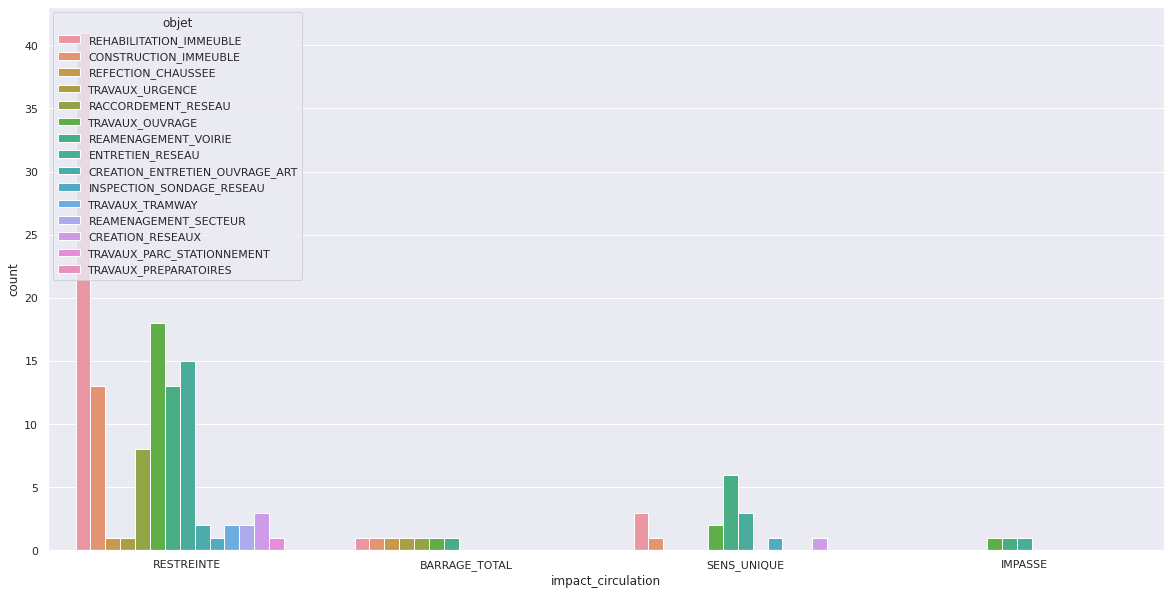

In [120]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
sns.countplot(x="impact_circulation", hue="objet" ,data=df_copy )
plt.show()

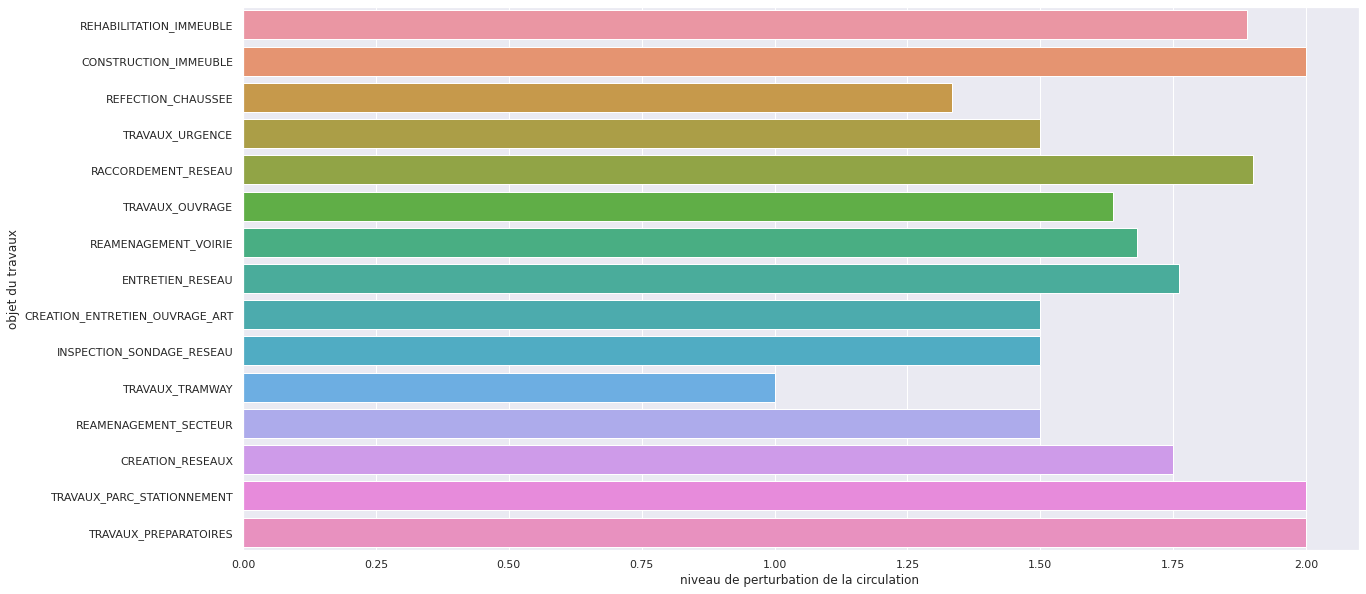

In [121]:

plt.figure(figsize=(20,10))

ax = sns.barplot(x = "niveau_perturbation", y = "objet", data = df, ci = None)

plt.xlabel("niveau de perturbation de la circulation ", fontsize= 12)
plt.ylabel("objet du travaux", fontsize= 12)


plt.show()